<a href="https://colab.research.google.com/github/Big-Shu-Nim/Coursera_ANN/blob/main/20220210_ImageDataGenerator_with_a_validation_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:00<00:00, 184MB/s]


In [ ]:
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U

In [9]:

import zipfile

# 훈련데이터 압축해제하기 
local_zip = './horse-or-human.zip' # 훈련데이터가 있는 zip파일 지정 객체에 담기
zip_ref = zipfile.ZipFile(local_zip, 'r') #파일 읽어오기, 'r'은 기존 그대로
zip_ref.extractall('./horse-or-human') # 디렉토리 안의 모든 맴버들 불러오기


In [10]:
# 2 평가데이터 압축해제하기 
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()  

zip_ref.close() 확인할 것 아마도 나가기나 닫기 같다. 

In [11]:
#3압축 해제된 훈련, 테스트의 이미지 파일 위치 지정해주기
import os


train_horse_dir = os.path.join('./horse-or-human/horses')


train_human_dir = os.path.join('./horse-or-human/humans')


validation_horse_dir = os.path.join('./validation-horse-or-human/horses')


validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [12]:
# 이미지들의 이름 일부 확인해보기 10번열까지 

train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse06-0.png', 'horse10-1.png', 'horse30-0.png', 'horse41-4.png', 'horse30-9.png', 'horse36-2.png', 'horse20-0.png', 'horse48-9.png', 'horse06-7.png', 'horse01-5.png']
TRAIN SET HUMANS: ['human04-10.png', 'human16-22.png', 'human16-01.png', 'human04-11.png', 'human08-25.png', 'human12-18.png', 'human05-28.png', 'human14-02.png', 'human05-09.png', 'human06-25.png']
VAL SET HORSES: ['horse5-303.png', 'horse1-298.png', 'horse4-503.png', 'horse5-076.png', 'horse5-519.png', 'horse3-055.png', 'horse3-326.png', 'horse2-254.png', 'horse1-484.png', 'horse4-403.png']
VAL SET HUMANS: ['valhuman01-20.png', 'valhuman04-09.png', 'valhuman03-14.png', 'valhuman03-16.png', 'valhuman01-05.png', 'valhuman03-21.png', 'valhuman03-02.png', 'valhuman01-12.png', 'valhuman02-11.png', 'valhuman05-22.png']


In [13]:
# 말과 사람의 합계
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 4*4 사이즈로 보여줄 것
nrows = 4
ncols = 4

# 이미지 마다 반복되는 인덱스 번호
pic_index = 0

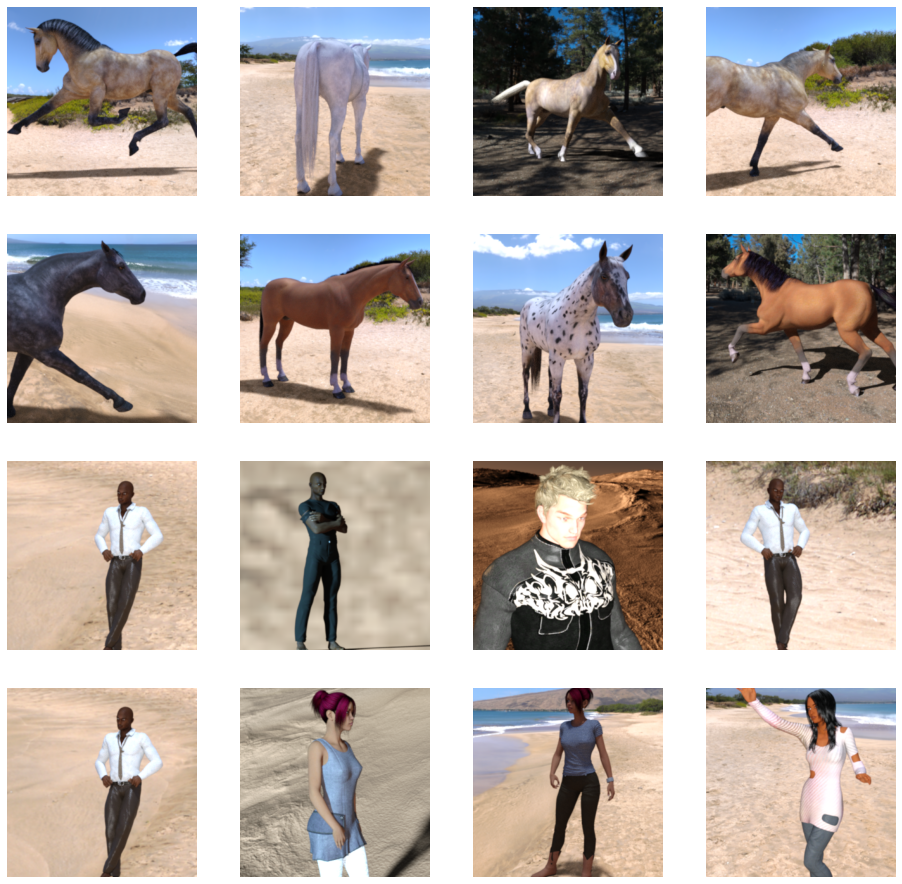

In [16]:
# 매플롯립의 영역을 지정해주고 사이즈 4*4 지정해주기
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # 서브플롯 셋팅
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [17]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # 원래 300&300*3 아니였나?
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 1차원 어레이로 변환
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 0 과 1 두개의 사이값을 가지는 1개 뉴런 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:

# 매 합성곱과 풀링이 진행될때마다 진행상황
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [19]:
# 모델 설정이후 이에대한 파라미터를 조정하는 컴파일 작업실행

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [20]:
#데이터 normalize | 파라미터의 리스케일을 사용해서

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [21]:
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [22]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 25s 1s/step - loss: 0.7954 - accuracy: 0.5673 - val_loss: 0.6698 - val_accuracy: 0.5195
Epoch 2/15
8/8 [==============================] - 12s 1s/step - loss: 0.6475 - accuracy: 0.6340 - val_loss: 0.5486 - val_accuracy: 0.6875
Epoch 3/15
8/8 [==============================] - 10s 1s/step - loss: 0.6170 - accuracy: 0.8343 - val_loss: 0.5147 - val_accuracy: 0.8438
Epoch 4/15
8/8 [==============================] - 10s 1s/step - loss: 0.2426 - accuracy: 0.9077 - val_loss: 0.4040 - val_accuracy: 0.8633
Epoch 5/15
8/8 [==============================] - 10s 1s/step - loss: 0.2517 - accuracy: 0.9244 - val_loss: 1.3236 - val_accuracy: 0.8242
Epoch 6/15
8/8 [==============================] - 10s 1s/step - loss: 0.1639 - accuracy: 0.9344 - val_loss: 1.8223 - val_accuracy: 0.7773
Epoch 7/15
8/8 [==============================] - 10s 1s/step - loss: 0.2713 - accuracy: 0.8776 - val_loss: 1.3719 - val_accuracy: 0.8320
Epoch 8/15
8/8 [==================

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving IMG_4130.JPG to IMG_4130.JPG
[8.547982e-29]
IMG_4130.JPG is a horse


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


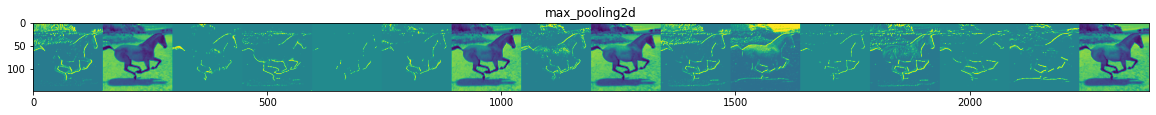

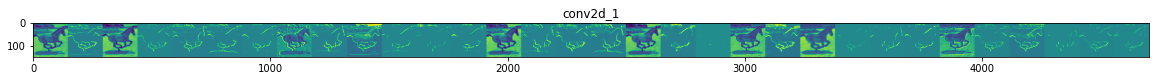

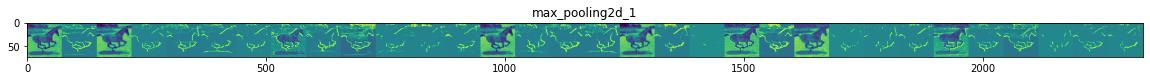

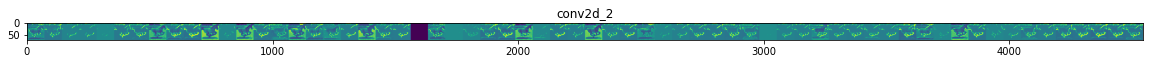

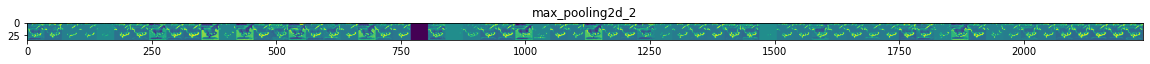

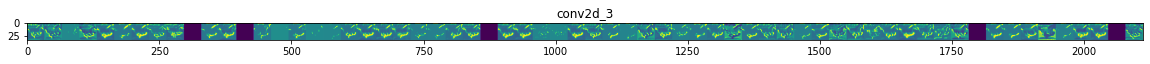

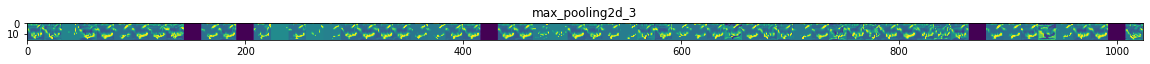

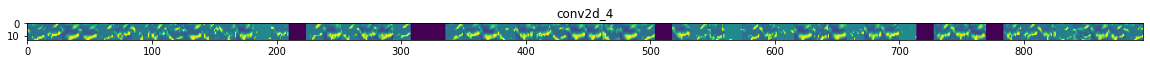

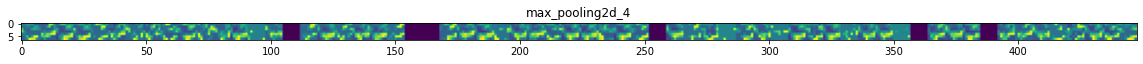

In [27]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')